In [2]:
import MPO_class as MPO
import MPS_class as MPS
import SpinSystems_1d as SS1d
import dmrg1 as dmrg
import thermal_tdvp2 as ttdvp
from MixedMPS_class import mix_compute_corr
import SpinSystems_2d as SS2d

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ncon import ncon

from compute_connected_correlation_function import compute_corr

In [4]:
h_space = [.1,.2]#np.arange(0.01,0.4,0.005)
L = 8
N = 2**L
J = 0.1
dbeta = 1e-3*5
sigma_z = np.array([[1,0],[0,-1]])

G = []; op1 = []; op2 = []
T = [];
for h in h_space:   
    print('h',h,end=' ')
    beta = 0.
    H = SS2d.IsingMPO_2D_diagonal_MPS(L,h=h,J=J)
    engine = ttdvp.thermalTDVP2(H)
    engine.initialize()
    E = []
    E.append(engine.MPS.contractMPOmixMPS(H))
    engine.chi_MAX = 128
    while(E[-1]+2*L*J*(L-1)>0):
        #print('diff:',E[-1]+2*L*J*(L-1))
        if beta<3*dbeta:
            engine.truncate_info = False
        else:
            engine.truncate_info = True
        engine.beta_step(dbeta,1e-11)
        E.append(engine.MPS.contractMPOmixMPS(H))
        beta += dbeta
    corr_stuff = mix_compute_corr(engine.MPS,sigma_z)

    G.append(corr_stuff[0])
    op1.append(corr_stuff[1][0])
    op2.append(corr_stuff[1][1])
    T.append(1/beta)
    print('T',1/beta)


h 0.1 

KeyboardInterrupt: 

In [9]:
for x in engine.MPS.M:
    print(x.shape)

(1, 2, 2, 3)
(3, 2, 2, 5)
(5, 2, 2, 6)
(6, 2, 2, 9)
(9, 2, 2, 9)
(9, 2, 2, 10)
(10, 2, 2, 17)
(17, 2, 2, 18)
(18, 2, 2, 23)
(23, 2, 2, 29)
(29, 2, 2, 37)
(37, 2, 2, 38)
(38, 2, 2, 41)
(41, 2, 2, 46)
(46, 2, 2, 48)
(48, 2, 2, 53)
(53, 2, 2, 54)
(54, 2, 2, 55)
(55, 2, 2, 56)
(56, 2, 2, 56)
(56, 2, 2, 56)
(56, 2, 2, 81)
(81, 2, 2, 82)
(82, 2, 2, 84)
(84, 2, 2, 87)
(87, 2, 2, 88)
(88, 2, 2, 88)
(88, 2, 2, 87)
(87, 2, 2, 118)
(118, 2, 2, 117)
(117, 2, 2, 119)
(119, 2, 2, 117)
(117, 2, 2, 119)
(119, 2, 2, 118)
(118, 2, 2, 119)
(119, 2, 2, 84)
(84, 2, 2, 84)
(84, 2, 2, 86)
(86, 2, 2, 86)
(86, 2, 2, 83)
(83, 2, 2, 80)
(80, 2, 2, 78)
(78, 2, 2, 52)
(52, 2, 2, 51)
(51, 2, 2, 52)
(52, 2, 2, 50)
(50, 2, 2, 49)
(49, 2, 2, 49)
(49, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 22)
(22, 2, 2, 20)
(20, 2, 2, 20)
(20, 2, 2, 18)
(18, 2, 2, 16)
(16, 2, 2, 14)
(14, 2, 2, 15)
(15, 2, 2, 10)
(10, 2, 2, 6)
(6, 2, 2, 3)
(3, 2, 2, 1)


In [108]:
for x in engine.MPS.M:
    print(x.shape)

(1, 2, 2, 4)
(4, 2, 2, 12)
(12, 2, 2, 13)
(13, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 32)
(32, 2, 2, 59)
(59, 2, 2, 58)
(58, 2, 2, 60)
(60, 2, 2, 33)
(33, 2, 2, 31)
(31, 2, 2, 30)
(30, 2, 2, 14)
(14, 2, 2, 12)
(12, 2, 2, 4)
(4, 2, 2, 1)


In [97]:
h_space.size

78

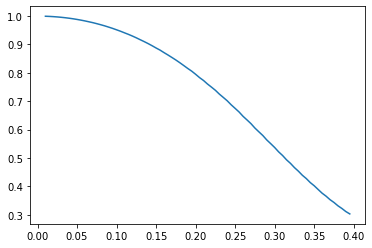

In [107]:
plt.plot(h_space,[(op2[x]).sum()/(16**2) for x in range(h_space.size)])

np.savetxt('4x4_J0.25.dat',np.array([(op2[x]).sum()/(16**2) for x in range(h_space.size)]))
np.savetxt('Temperature_4x4_J0.25.dat',T)

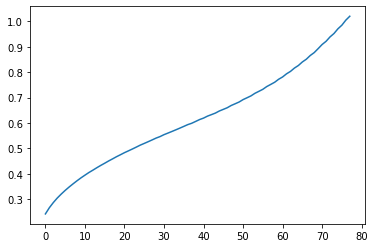

In [109]:
plt.plot(T)

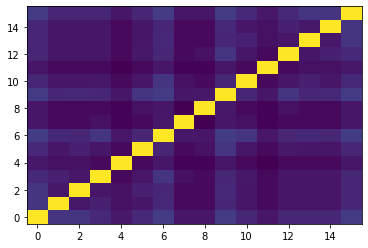

In [208]:
plt.imshow(op2[-1,:,:],aspect='auto',origin='lower')

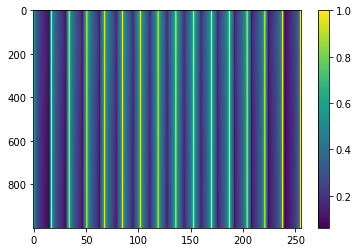

In [40]:
plt.imshow(op2[:,:].reshape(-1,256),aspect='auto')
plt.colorbar()

In [8]:
corr_stuff[0]

(1.038197773581648,
 (array([[ 5.55111512e-16],
         [-2.22044605e-16],
         [ 5.55111512e-16],
         [ 0.00000000e+00],
         [ 1.11022302e-16],
         [ 6.66133815e-16],
         [ 6.66133815e-16],
         [ 3.33066907e-16],
         [-8.88178420e-16],
         [-3.33066907e-16],
         [-2.22044605e-16],
         [ 1.11022302e-16],
         [-1.11022302e-16],
         [-4.44089210e-16],
         [-5.55111512e-16],
         [-3.33066907e-16]]),
  array([[ 1.00000000e+00,  1.99920038e-02,  3.99733495e-04,
           7.99253888e-06,  1.59808168e-07,  3.19531141e-09,
           6.38891935e-11,  1.27744296e-12,  2.55420727e-14,
           5.10724884e-16,  1.02179686e-17,  2.06171916e-19,
           3.49891739e-21, -2.70499673e-22, -1.99382111e-22,
          -3.34808424e-24],
         [ 1.99920038e-02,  1.00000000e+00,  1.99920043e-02,
           3.99733504e-04,  7.99253905e-06,  1.59808172e-07,
           3.19531148e-09,  6.38891806e-11,  1.27744407e-12,
           2.5

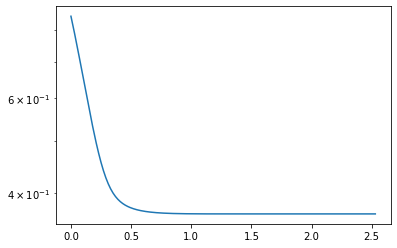

In [209]:
plt.plot(dbeta*np.arange(len(mx)),np.abs(mx-ncon([engine_GS.MPS.M[0],sigma_x,engine_GS.MPS.M[0]],[[1,2,3],[2,5],[1,5,3]])))
plt.yscale('log')

In [171]:
engine_GS = dmrg.DMRG1(H)

In [172]:
engine_GS.initialize(64)

In [173]:
for _ in range(10):
    engine_GS.dmrg_step()

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


In [28]:
ncon([engine_GS.MPS.M[0],sigma_x,engine_GS.MPS.M[0]],[[1,2,3],[2,5],[1,5,3]])

array(0.84978976+0.j)

In [13]:
sigma_z.shape

(2, 2)

In [27]:
2*L*(L-1)

24

In [17]:
engine.MPS.M[10]

array([[[[-6.72026324e-01+0.j,  1.50864738e-01+0.j,
          -3.02278976e-04+0.j,  4.01305618e-05+0.j]],

        [[-6.72026324e-01+0.j, -1.50864738e-01+0.j,
           3.02278976e-04+0.j,  4.01305618e-05+0.j]]],


       [[[ 1.50865764e-01+0.j, -5.34585430e-02+0.j,
          -8.51797981e-04+0.j,  1.78749657e-04+0.j]],

        [[-1.50865764e-01+0.j, -5.34585430e-02+0.j,
          -8.51797981e-04+0.j, -1.78749657e-04+0.j]]],


       [[[ 1.49957575e-05+0.j, -9.64407129e-04+0.j,
          -6.60284616e-05+0.j,  1.26651968e-05+0.j]],

        [[-1.49957575e-05+0.j, -9.64407129e-04+0.j,
          -6.60284616e-05+0.j, -1.26651968e-05+0.j]]],


       [[[-5.26069215e-04+0.j,  3.05892720e-04+0.j,
           1.20345853e-05+0.j, -2.66202701e-06+0.j]],

        [[-5.26069215e-04+0.j, -3.05892720e-04+0.j,
          -1.20345853e-05+0.j, -2.66202701e-06+0.j]]]])

<ipython-input-190-88bf739c51ae>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/beta_space[:G.size],[(op2[x] ).sum()/(64**2) for x in range(G.size)])
<ipython-input-190-88bf739c51ae>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/beta_space[:G.size],np.ones(G.size)*(corr_gs ).sum()/(64**2))


(-5.0, 50.0)

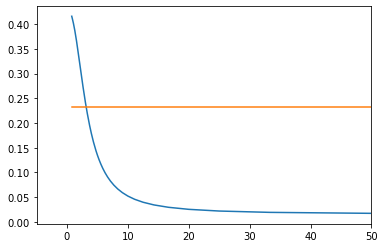

In [190]:
plt.plot(1/beta_space[:G.size],[(op2[x] ).sum()/(64**2) for x in range(G.size)])
plt.plot(1/beta_space[:G.size],np.ones(G.size)*(corr_gs ).sum()/(64**2))

plt.xlim([-5,50])



In [192]:
op2[0].sum()/(64**2)

0.01562499999999999

In [176]:
import compute_connected_correlation_function
stuffs = compute_connected_correlation_function.compute_corr(engine_GS.MPS,sigma_z)

In [180]:
corr_gs = stuffs[1][1]

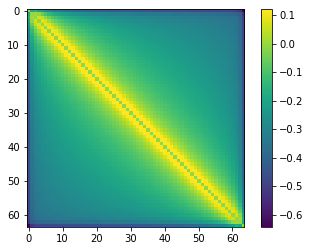

In [186]:
plt.imshow(corr_gs-(op2[-1] - np.eye(64)))
plt.colorbar()